<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/2_09_12_Univariate_plotting_cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Visualizations: Plotting One Variable at a Time

To run this notebook, first download [this cereal data](https://docs.google.com/spreadsheets/d/1YzP0CF_stFjav6fkXeQ0J0gpk1PQoY2l/edit?usp=sharing&ouid=100081525283421980531&rtpof=true&sd=true) and upload it to this temporary Colab environment or your own drive folder.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
## filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path ="https://docs.google.com/spreadsheets/d/e/2PACX-1vR4AOPKKW6zLpiLygapfcRy1vJjV130vQGRCy2v4Tx8vJARHy9K28TWVFboFOgxiPAGEu5R6nWZw3Qw/pub?output=xlsx"
cereal = pd.read_excel(path, header=1)
cereal.head()

,name,Manufacturer,type,calories per serving,grams of protein,grams of fat,milligrams of sodium,grams of dietary fiber,grams of complex carbohydrates,grams of sugars,milligrams of potassium,vitamins and minerals (% of FDA recommendation),Display shelf,Weight in ounces per one serving,Number of cups in one serving,Rating of cereal
0,Apple Cinnamon Cheerios,General Mills,Cold,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.0,1.00,0.75,29.509541
1,Basic 4,General Mills,Cold,130.0,3.0,2.0,210.0,2.0,18.0,8.0,100.0,25.0,3.0,1.33,0.75,37.038562
2,Cheerios,General Mills,Cold,110.0,6.0,2.0,290.0,2.0,17.0,1.0,105.0,25.0,1.0,1.00,1.25,50.764999
3,Cinnamon Toast Crunch,General Mills,Cold,120.0,1.0,3.0,210.0,0.0,13.0,9.0,45.0,25.0,2.0,1.00,0.75,19.823573
4,Clusters,General Mills,Cold,110.0,3.0,2.0,140.0,2.0,13.0,7.0,105.0,25.0,3.0,1.00,0.50,40.400208


# Pandas and Matplotlib.pyplot

Pandas uses plt behind the scenes to plot data.  You can use plt functions and methods to interact with plots you make with the df.plot() method.

## Bar Charts:  Plotting Categorical Frequencies

In [ ]:
#Count cereals from each manufacturer
manufacturer_counts = cereal['Manufacturer'].value_counts()#.sort_values()
manufacturer_counts

Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: Manufacturer, dtype: int64

In [ ]:
type(manufacturer_counts)

pandas.core.series.Series

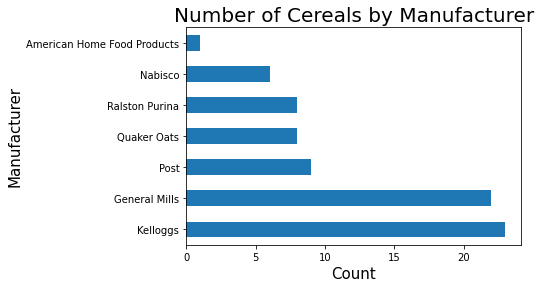

Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: Manufacturer, dtype: int64

In [ ]:
#Plot the counts of each cereal brand

manufacturer_counts.plot(kind = 'barh')
plt.title('Number of Cereals by Manufacturer', fontsize = 20)
plt.ylabel('Manufacturer', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart below the plot
manufacturer_counts

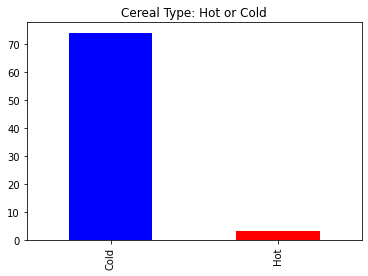

Cold    74
Hot      3
Name: type, dtype: int64

In [ ]:
#Distribution of Cereal types
cereal_types = cereal['type'].value_counts()

#Let's give it some color
cereal_types.plot(kind = 'bar', color = ['blue','red'])
plt.title('Cereal Type: Hot or Cold')
plt.show()

cereal_types

## Histograms: Plotting Continuous Distributions



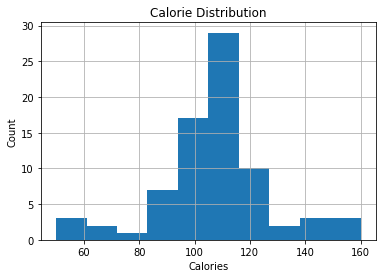

Calories per serving tend to fall around 110


In [ ]:
#Create a histogram of a continuous variable: calories per serving
# with default numer of bins (10)
cereal['calories per serving'].hist()

#Set the label of the x axis
plt.xlabel('Calories')

#Set the label of the y axis
plt.ylabel('Count')

#Give it a title
plt.title('Calorie Distribution')
plt.show()
print('Calories per serving tend to fall around 110')

### Let's try automatically adjusting the # of bins `bins='auto'`

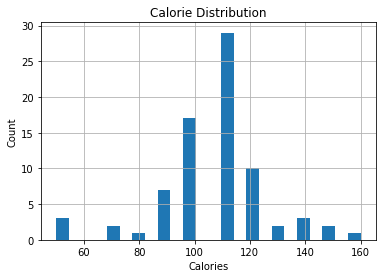

With more bins we see there are some higher numbers 
at the low and high calorie counts


In [ ]:
#Histogram of calories per serving: bins='auto'
cereal['calories per serving'].hist(bins='auto')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.title('Calorie Distribution')
plt.show()
print('With more bins we see there are some higher numbers \nat the low and high calorie counts');

# Box and Whisker Plots: Quartiles and Outliers

Box and Whisker plots can help us visualize statistical distributions in meaningful ways.


![Box and Whisker Plot](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

They can answer:

1. How spread out is our data?
2. Is the data skewed high or low?
3. Are there outlier values, values that are very far from most of the others?

In [ ]:
#Check the summary statistics of potassium content
cereal['milligrams of potassium'].describe()

count     77.000000
mean      96.077922
std       71.286813
min       -1.000000
25%       40.000000
50%       90.000000
75%      120.000000
max      330.000000
Name: milligrams of potassium, dtype: float64

# Finding 'Minimum' and 'Maximum' and Outliers

## (Different than the actual min and max value)

According to the results of our df.describe() above:

1. First Quartile (Q1) = 40
2. Third Quartile (Q3) = 120
3. Interquartile Range (IQR) = Q3 - Q1 = 80
4. 1.5 * IQR = 120
5. 'Minimum' (before outliers) is Q1 - 120 = -80
6. 'Maximum' (before outliers) is Q3 + 120 = 240

Notice below that the lower whisker is at -1, which is the actual minimum value (the plot does not cover non-existent values), and the upper whisker is at 240.

We can see a few outliers above 240.

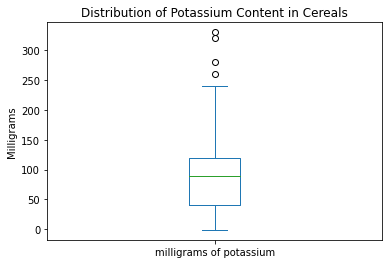

In [ ]:
#Boxplot of potassium content of cereals
cereal['milligrams of potassium'].plot(kind='box')
plt.title('Distribution of Potassium Content in Cereals')
plt.ylabel('Milligrams');
#plt.show()

# Okay, Let's Get Fancy!

[Here is a link to the pandas.DataFrame.boxplot method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

You can see all the arguments and description of what they do there.


In [ ]:
cereal['Manufacturer'].value_counts()

Kelloggs                       23
General Mills                  22
Post                            9
Quaker Oats                     8
Ralston Purina                  8
Nabisco                         6
American Home Food Products     1
Name: Manufacturer, dtype: int64

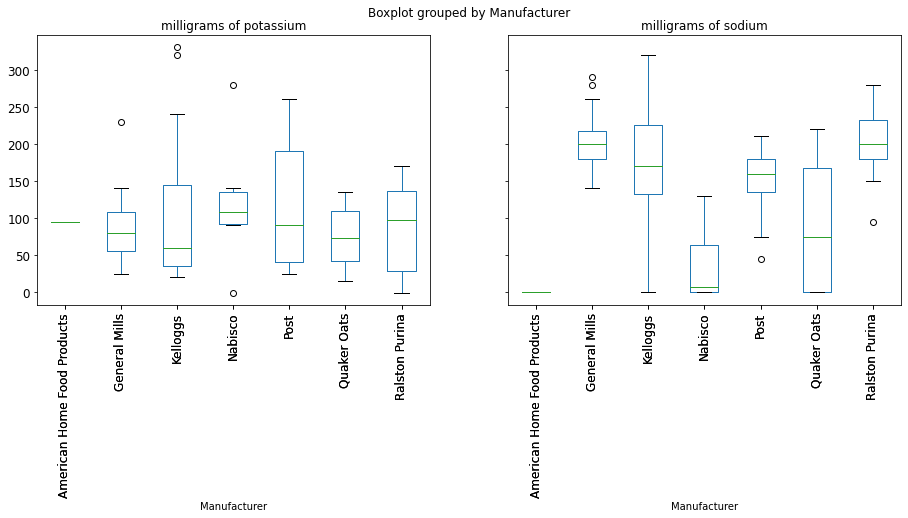

In [ ]:
#df.boxplot can plot multiple columns at a time and group by a categorical column

cereal.boxplot(['milligrams of potassium', 'milligrams of sodium'],  # column or columns to plot
               by = 'Manufacturer',  # column to group by
               figsize = (15,5), # size of the figure
               fontsize = 12, # size of the text
               rot=90,# degree of rotation of the labels
               grid=False # turn off the grid
               ) # How else can you enhance this plot?

plt.show()

# What does the above boxplot tell you?

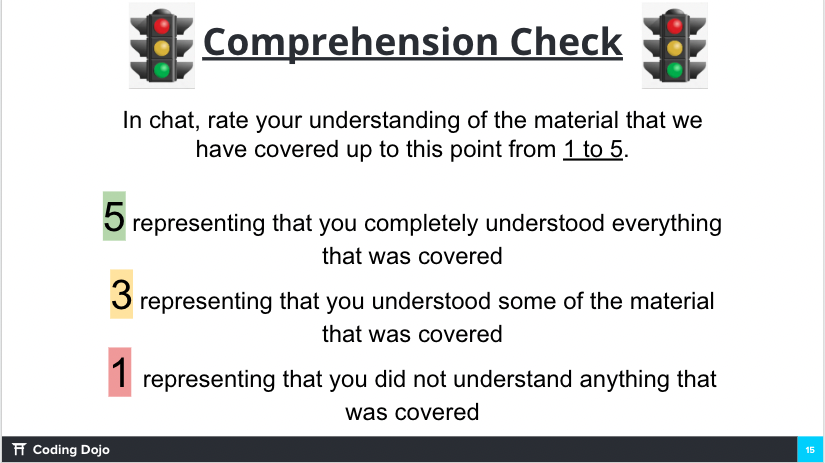